In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


# Importing Libraries

In [0]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix 

#ignore warnings
import warnings
warnings.filterwarnings('ignore')
import os

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8
%matplotlib inline

# Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb

# Importing the dataset
Dataset is compressed. Therefore, first I unzipped the datasets and then importing them.

In [0]:
import zipfile

zf = zipfile.ZipFile('/content/gdrive/My Drive/PeopleInteractive/listings.zip')
df = pd.read_csv(zf.open("listings.csv"), sep=";")

zf2 = zipfile.ZipFile('/content/gdrive/My Drive/PeopleInteractive/listings_test_send.zip')
test_df = pd.read_csv(zf2.open("listings_test_send.csv"), sep=";")

In [105]:
#checking the data size
print("\nThe train data size is : {} ".format(df.shape))
print("The test data size is : {} ".format(test_df.shape))


The train data size is : (341147, 73) 
The test data size is : (100703, 72) 


In [106]:
df.info()
print('-'*25)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341147 entries, 0 to 341146
Data columns (total 73 columns):
Unnamed: 0                        341147 non-null object
ID                                281035 non-null object
Name                              340843 non-null object
Summary                           330066 non-null object
Space                             239355 non-null object
Description                       341040 non-null object
Experiences_Offered               341147 non-null object
Neighborhood_Overview             201313 non-null object
Notes                             135623 non-null object
Transit                           209960 non-null object
Access                            185199 non-null object
Interaction                       177176 non-null object
House_Rules                       205030 non-null object
Host_Name                         340783 non-null object
Host_Since                        340783 non-null object
Host_Location                     

In [107]:
df.head(5)

,Unnamed: 0,ID,Name,Summary,Space,Description,Experiences_Offered,Neighborhood_Overview,Notes,Transit,...,Last_Review,License,Jurisdiction_Names,Cancellation_Policy,Calculated_host_listings_count,Reviews_per_Month,Geolocation,Features,Listing_Type,Rating
0,70285,199681.0,Private room in sunny three bedroom,This apartment in the West Rogers Park (or Wes...,Hi there traveler. Thanks for considering sta...,This apartment in the West Rogers Park (or Wes...,none,I love that my neighborhood is so quiet and lo...,NaN,Parking around here is very easy. You might wi...,...,2016-09-18,City registration pending,"Illinois State, Cook County, IL, CHICAGO",moderate,4.0,1.34,"41.9941700301, -87.6920295649","Host Has Profile Pic,Host Identity Verified,Re...",Good,67259.201267
1,44913,4216764.0,Lovely & cute apartment,Lovely apartment for a couple or a single pers...,Interior desig in accordance with the Scandina...,Lovely apartment for a couple or a single pers...,none,Quite and peaceful neighborhood in the Frederi...,"Please note that the bed is rather small (1,5 ...",Close to bus and the metro stations 'Frederiks...,...,2014-10-31,NaN,NaN,flexible,1.0,0.03,"55.6913945558, 12.5352884346",Host Has Profile Pic,Good,58503.191267
2,154025,14879686.0,Unique house with a beautiful garden,Beautiful design cosy family house with a nice...,"Beautiful garden, two level house (105 m2) nea...",Beautiful design cosy family house with a nice...,none,Nice multicultural neighbourhood with plenty o...,Since our house is designed to be child friend...,Tram and bus stops in a 5 minutes walk distanc...,...,2016-10-02,NaN,Amsterdam,strict,1.0,0.29,"52.3689656398, 4.84983993143","Host Has Profile Pic,Is Location Exact",Good,58480.587448
3,281148,9879014.0,Résidence du 14 Rue des Sablons;,"50 m2, un grand lit et un canapé lit deux plac...",NaN,"50 m2, un grand lit et un canapé lit deux plac...",none,NaN,NaN,NaN,...,NaN,NaN,Paris,flexible,1.0,NaN,"48.8663711212, 2.28291441119","Host Has Profile Pic,Is Location Exact",Bad,NaN
4,235251,14372222.0,Darling 2 story historical spanish,"2 blocks from beach, 1 block from 2nd st",NaN,"2 blocks from beach, 1 block from 2nd st Kitch...",none,NaN,NaN,Yes,...,NaN,NaN,NaN,flexible,1.0,NaN,"33.7595912067, -118.138810843",Host Has Profile Pic,Bad,NaN


In [108]:
test_df.head(5)

,Unnamed: 0,GUID,Name,Summary,Space,Description,Experiences_Offered,Neighborhood_Overview,Notes,Transit,...,First_Review,Last_Review,License,Jurisdiction_Names,Cancellation_Policy,Calculated_host_listings_count,Reviews_per_Month,Geolocation,Features,Rating
0,0,44365,Spacious Modern Loft in Surry Hills,We invite you to stay in our spacious and tren...,Our spacious and trendy loft apartment is spli...,We invite you to stay in our spacious and tren...,none,Great restaurants and bars in Surry Hills. All...,There is a sofa bed in the Study if there are ...,The apartment is a 5 minute walk from Central ...,...,NaN,NaN,NaN,NaN,strict,1.0,NaN,NaN,NaN,NaN
1,1,90920,"Bright, spacious sanctuary duplex, modern haci...",2017 October availability: Lot's of natural l...,"Truly unique in Chicago, this duplex up was de...",2017 October availability: Lot's of natural l...,none,Amazing West Town corner location in Ukrainian...,Main outside door must be checked and kept clo...,CTA Grand Avenue bus #65 stops right in front....,...,2017-02-27,2017-03-28,City registration pending,"Illinois State, Cook County, IL, CHICAGO",strict,1.0,0.82,"41.8903865975, -87.6840709393","Host Has Profile Pic,Host Identity Verified,Is...",73124.715357
2,2,306757,Central London penthouse EC1,The accommodation is a double bedroom (with ac...,A modern penthouse in an old factory with a vi...,The accommodation is a double bedroom (with ac...,none,"Vibrant, stylish, historic - Clerkenwell has e...",NaN,Spoilt for choice - we are so central that we ...,...,2015-06-08,2017-03-03,NaN,NaN,strict,1.0,7.16,"51.5259876158, -0.105389874967","Host Is Superhost,Host Has Profile Pic,Host Id...",71669.189303
3,3,446360,Cosy & Design 2 bedroom flat ALIGRE,NaN,"Lovely Flat, fully renovated, ideally located ...","Lovely Flat, fully renovated, ideally located ...",none,NaN,NaN,NaN,...,NaN,NaN,NaN,Paris,moderate,1.0,NaN,"48.8447276192, 2.38201047088","Host Has Profile Pic,Is Location Exact",NaN
4,4,191221,"Casa de vacaciones ""Casa Rosa""","Nuestra casa, situada en un entorno tranquilo ...",NaN,Piscina y jardin privado Es una zona muy tranq...,none,"Es una zona muy tranquila, perfecta para vacac...",NaN,Para moverse de una zona a otra lo mejor es al...,...,NaN,NaN,NaN,NaN,strict,2.0,NaN,"39.9173293851, 3.05069931089","Host Has Profile Pic,Is Location Exact,Require...",NaN


# Non-common columns in df and test_df. 
To find non-common columns first I make a list of column's headers for each df and test_df. Then a construct a set out of list items. After this applied XOR operator on both sets to find non-common columns. This also helps in finding target column "Listing_Type".

In [109]:
set(list(df))^set(list(test_df))

{'GUID', 'ID', 'Listing_Type'}

# Drop unnecessary columns
 Dropping unnecessary columns, these columns won't be useful in analysis and prediction.

In [0]:
df = df.drop(['Unnamed: 0', 'ID'], axis=1)
test_df = test_df.drop(['Unnamed: 0', 'GUID'], axis=1)

# Listing_Type
Our target variable. We have to predict Listing Type in test_df.

In [0]:
# Listing_Type
df['Listing_Type'].value_counts()

# dummy encoding
df = pd.get_dummies(df,columns=['Listing_Type'])

# drop 'Listing_Type_Bad' to avoid dummy variable trap
df = df.drop(['Listing_Type_Bad'], axis=1)

# Handling NaN Values in the DataFrame
Looks like we have lot of NaN values in the df. Let's explore there count.

In [112]:
null = pd.DataFrame(data= df.isnull().sum()/len(df)*100, 
                    columns=['Percentage of Values Missing'],
                    index=df.columns
                   ).reset_index()

null['Percentage of Values Missing'].mean()

21.350459099515856

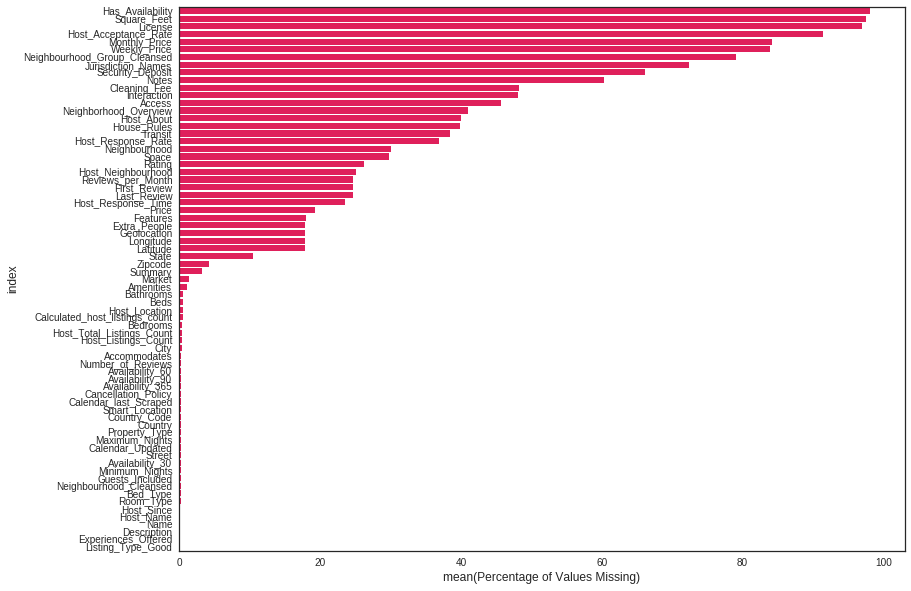

In [113]:
plt.rcParams["figure.figsize"] = (13,10)
sns.barplot(x= 'Percentage of Values Missing', 
            y='index', 
            data= null.sort_values(by='Percentage of Values Missing', ascending=False),
            color = '#ff004f')

In [114]:
## Caution - Only 50% percentile missing values are taken.
Notorious_null = null[null['Percentage of Values Missing'] > null['Percentage of Values Missing'].mean()]

Notorious_null.sort_values(by='Percentage of Values Missing', ascending=False).head(10)

,index,Percentage of Values Missing
53,Has_Availability,98.113423
42,Square_Feet,97.589895
62,License,97.009500
17,Host_Acceptance_Rate,91.352994
45,Monthly_Price,84.203584
44,Weekly_Price,83.832483
24,Neighbourhood_Group_Cleansed,79.008169
63,Jurisdiction_Names,72.388736
46,Security_Deposit,66.063603
6,Notes,60.244997


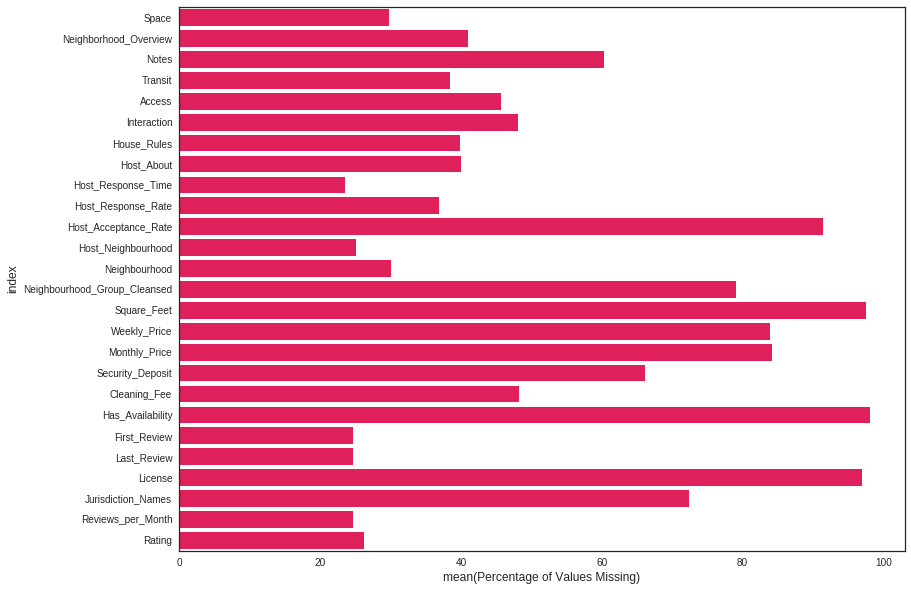

In [115]:
plt.rcParams["figure.figsize"] = (13,10)
sns.barplot(x= 'Percentage of Values Missing', 
            y='index', 
            data= Notorious_null,
            color = '#ff004f')

In [116]:
len(null) - len(Notorious_null)

45

**Dropping all the NaN values above 90%**

In [0]:
null_drop = null[null['Percentage of Values Missing'] > 85]

col_to_drop = []
for cols in list(null_drop['index'].values):
    col_to_drop.append(cols)

In [0]:
df.drop(col_to_drop, axis=1, inplace=True)

**Handling NaN values of test_df**

In [119]:
test_null = pd.DataFrame(data= test_df.isnull().sum()/len(test_df)*100, 
                    columns=['Percentage of Values Missing'],
                    index=test_df.columns
                   ).reset_index()

test_null['Percentage of Values Missing'].mean()

21.534313774167607

In [120]:
## Caution - Only 50% percentile missing values are taken.
Notorious_test_null = test_null[test_null['Percentage of Values Missing'] > test_null['Percentage of Values Missing'].mean()]

Notorious_test_null.sort_values(by='Percentage of Values Missing', ascending=False).head(10)

,index,Percentage of Values Missing
53,Has_Availability,98.008997
42,Square_Feet,97.548236
62,License,97.027894
17,Host_Acceptance_Rate,91.265404
45,Monthly_Price,84.334131
44,Weekly_Price,83.772082
24,Neighbourhood_Group_Cleansed,79.176390
63,Jurisdiction_Names,72.245117
46,Security_Deposit,65.987111
6,Notes,60.467911


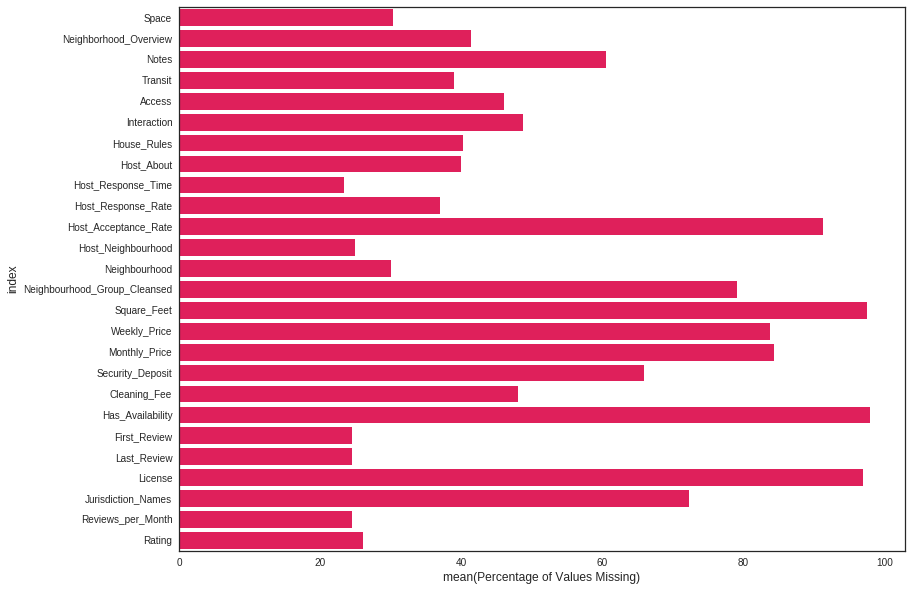

In [121]:
plt.rcParams["figure.figsize"] = (13,10)
sns.barplot(x= 'Percentage of Values Missing', 
            y='index', 
            data= Notorious_test_null,
            color = '#ff004f')

In [122]:
len(test_null) - len(Notorious_test_null)

44

In [0]:
test_null_drop = test_null[test_null['Percentage of Values Missing'] > 85]

test_col_to_drop = []
for test_cols in list(test_null_drop['index'].values):
    test_col_to_drop.append(test_cols)

In [0]:
test_df.drop(test_col_to_drop, axis=1, inplace=True)

# Co-relation between Listing_Type_Good and other columns

In [125]:
corr_mx = df.corr()
corr_mx["Listing_Type_Good"].sort_values(ascending=False)

Listing_Type_Good                 1.000000
Number_of_Reviews                 0.143141
Host_Response_Rate                0.134765
Availability_365                  0.056855
Extra_People                      0.045003
Rating                            0.044050
Host_Total_Listings_Count         0.041110
Calculated_host_listings_count    0.039085
Reviews_per_Month                 0.023711
Beds                              0.020382
Bedrooms                          0.005382
Minimum_Nights                    0.001573
Bathrooms                        -0.000235
Security_Deposit                 -0.001178
Price                            -0.003585
Latitude                         -0.007398
Availability_90                  -0.011829
Longitude                        -0.013832
Availability_30                  -0.024397
Availability_60                  -0.025808
Name: Listing_Type_Good, dtype: float64

# Now we will be working on few columns to fill NaN values

## Rating

In [126]:
print(df['Rating'].isna().sum())
print("-"*25)
print(test_df['Rating'].isna().sum())

89674
-------------------------
26215


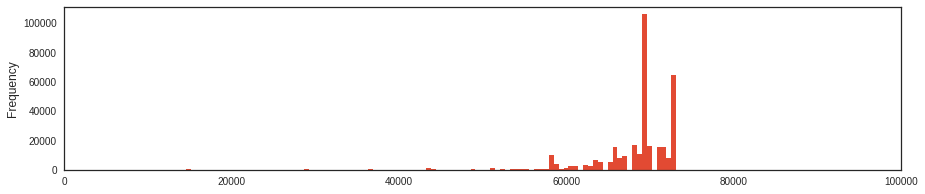

In [127]:
# for df and test_df, since there is a missing "Rating" values
df["Rating"].fillna(df["Rating"].median(), inplace=True)
test_df["Rating"].fillna(test_df["Rating"].median(), inplace=True)

# convert from float to int
df['Rating'] = df['Rating'].astype(int)
test_df['Rating'] = test_df['Rating'].astype(int)

df['Rating'].plot(kind='hist', figsize=(15,3),bins=100, xlim=(0,100000))

In [128]:
# Divide 'Rating' into groups
r = pd.qcut(df['Rating'], 4)
print (df.groupby(r).Listing_Type_Good.mean())

Rating
(14630.999, 67283.0]    0.971683
(67283.0, 69475.0]      0.792185
(69475.0, 71661.0]      0.985173
(71661.0, 73151.0]      0.975983
Name: Listing_Type_Good, dtype: float64


In [0]:
# Assign number to Rating limits
df.Rating.loc[ (df.Rating <= 67282) ]= 0
df.Rating.loc[ (df.Rating > 67282) & (df.Rating <=  69475) ]= 1
df.Rating.loc[ (df.Rating > 69475) & (df.Rating <= 71661) ]= 2
df.Rating.loc[ (df.Rating > 71661) ]= 3


test_df.Rating.loc[ (test_df.Rating <= 67282) ]= 0
test_df.Rating.loc[ (test_df.Rating > 67282) & (test_df.Rating <=  69475) ]= 1
test_df.Rating.loc[ (test_df.Rating > 69475) & (test_df.Rating <= 71661) ]= 2
test_df.Rating.loc[ (test_df.Rating > 71661) ]= 3

## Number_of_Reviews
Now we will be working on Number of Reviews

In [130]:
print(df["Number_of_Reviews"].isna().sum())
print("-----------------")
print(test_df["Number_of_Reviews"].isna().sum())

959
-----------------
1


dropping rows which has NaN values because dataset is large and missing values are very less

In [0]:
df = df.dropna(subset=['Number_of_Reviews'])
test_df = test_df.dropna(subset=['Number_of_Reviews'])

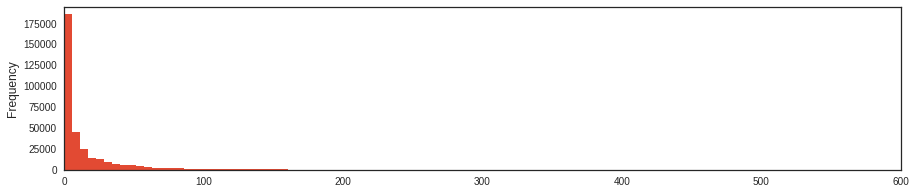

In [132]:
# convert from float to int
df['Number_of_Reviews'] = df['Number_of_Reviews'].astype(int)
test_df['Number_of_Reviews'] = test_df['Number_of_Reviews'].astype(int)

df['Number_of_Reviews'].plot(kind='hist', figsize=(15,3),bins=100, xlim=(0,600))

In [133]:
# Divide 'Rating' into groups
r = pd.qcut(df['Number_of_Reviews'], 2)
print (df.groupby(r).Listing_Type_Good.mean())

Number_of_Reviews
(-0.001, 4.0]    0.836709
(4.0, 574.0]     0.982931
Name: Listing_Type_Good, dtype: float64


In [0]:
# Assign number to Rating limits
df.Number_of_Reviews.loc[ (df.Number_of_Reviews <= 4) ]= 0
df.Number_of_Reviews.loc[ (df.Number_of_Reviews > 4) ]= 1


test_df.Number_of_Reviews.loc[ (test_df.Number_of_Reviews <= 4) ]= 0
test_df.Number_of_Reviews.loc[ (test_df.Number_of_Reviews > 4) ]= 1

## Host_Response_Rate
Filling NaN values in Host_Response_Rate Column

In [135]:
print(df["Host_Response_Rate"].isna().sum())
print("-"*25)
print(test_df["Host_Response_Rate"].isna().sum())

125044
-------------------------
37288


Filling missing column using **Interpolation**

In [0]:
df["Host_Response_Rate"].interpolate(method='linear', axis=0, inplace = True)

test_df["Host_Response_Rate"].interpolate(method='linear', axis=0, inplace = True)

In [137]:
print(df["Host_Response_Rate"].isna().sum())
print("-"*25)
print(test_df["Host_Response_Rate"].isna().sum())

0
-------------------------
1


We are still left with 1 row with NaN value in test_df. Therefore, we have drop it.

In [0]:
test_df = test_df.dropna(subset=['Host_Response_Rate'])

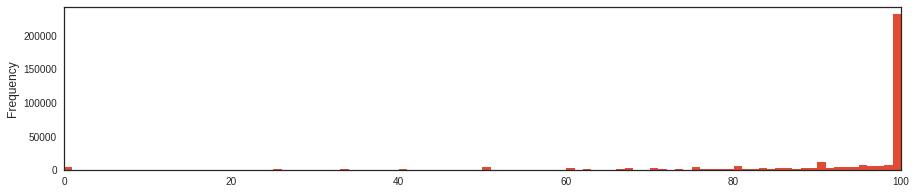

In [139]:
# convert from float to int
df['Host_Response_Rate'] = df['Host_Response_Rate'].astype(int)
test_df['Host_Response_Rate'] = test_df['Host_Response_Rate'].astype(int)

df['Host_Response_Rate'].plot(kind='hist', figsize=(15,3),bins=100, xlim=(0,100))

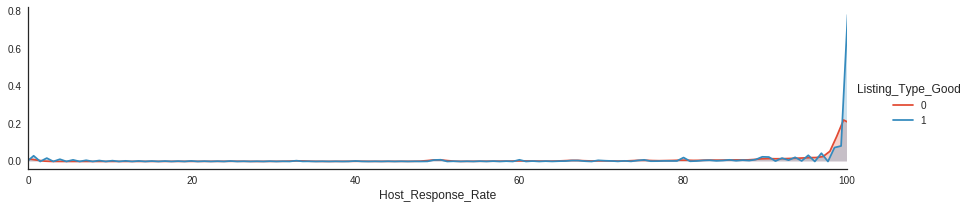

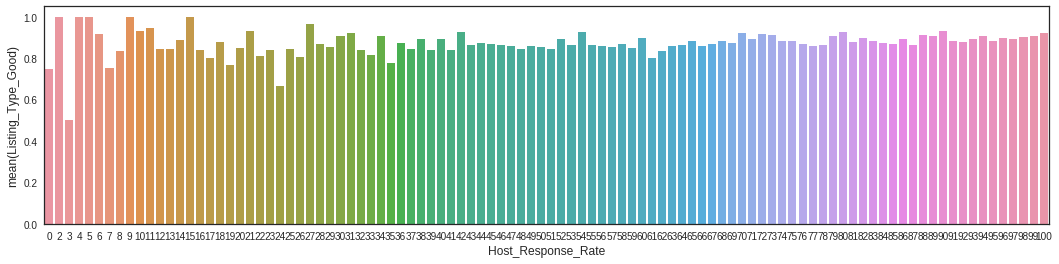

In [140]:
# peaks for Listing_Type_Good or not by their Host_Response_Rate
facet = sns.FacetGrid(df, hue="Listing_Type_Good",aspect=4)
facet.map(sns.kdeplot,'Host_Response_Rate',shade= True)
facet.set(xlim=(0, df['Host_Response_Rate'].max()))
facet.add_legend()

# average Listing_Type_Good by Host_Response_Rate
fig, axis1 = plt.subplots(1,1,figsize=(18,4))
average_Host_Response_Rate = df[["Host_Response_Rate", "Listing_Type_Good"]].groupby(['Host_Response_Rate'],as_index=False).mean()
sns.barplot(x='Host_Response_Rate', y='Listing_Type_Good', data=average_Host_Response_Rate)

In [141]:
# Divide 'Host_Response_Rate' into groups
a = pd.cut(df['Host_Response_Rate'], 4)
print (df.groupby(a).Listing_Type_Good.mean())


Host_Response_Rate
(-0.1, 25.0]     0.777557
(25.0, 50.0]     0.855254
(50.0, 75.0]     0.883407
(75.0, 100.0]    0.913735
Name: Listing_Type_Good, dtype: float64


In [0]:
# Assign number to Host_Response_Rate limits
df.Host_Response_Rate.loc[ (df.Host_Response_Rate <= 25) ]= 0
df.Host_Response_Rate.loc[ (df.Host_Response_Rate > 25) & (df.Host_Response_Rate <=  50) ]= 1
df.Host_Response_Rate.loc[ (df.Host_Response_Rate > 50) & (df.Host_Response_Rate <=  75) ]= 2
df.Host_Response_Rate.loc[ (df.Host_Response_Rate > 75) ]= 3


test_df.Host_Response_Rate.loc[ (test_df.Host_Response_Rate <= 25) ]= 0
test_df.Host_Response_Rate.loc[ (test_df.Host_Response_Rate > 25) & (test_df.Host_Response_Rate <=  50) ]= 1
test_df.Host_Response_Rate.loc[ (test_df.Host_Response_Rate > 50) & (test_df.Host_Response_Rate <=  75) ]= 2
test_df.Host_Response_Rate.loc[ (test_df.Host_Response_Rate > 75) ]= 3

## Extra_People
Filling NaN values in Extra_People with 0 because it has most number of occurence.

In [143]:
print(df['Extra_People'].isna().sum())
print("-"*25)
print(test_df['Extra_People'].isna().sum())

60129
-------------------------
17863


In [0]:
df['Extra_People'].fillna(0, inplace = True)
test_df['Extra_People'].fillna(0, inplace = True)

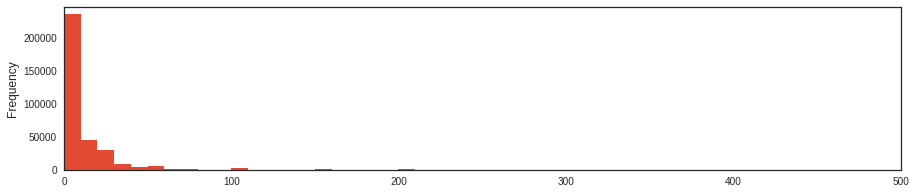

In [145]:
# convert from float to int
df['Extra_People'] = df['Extra_People'].astype(int)
test_df['Extra_People'] = test_df['Extra_People'].astype(int)

df['Extra_People'].plot(kind='hist', figsize=(15,3),bins=100, xlim=(0,500))

In [146]:
# Divide 'Extra_People' into groups
a = pd.cut(df['Extra_People'], 5)
print (df.groupby(a).Listing_Type_Good.mean())

Extra_People
(-0.999, 199.8]    0.908225
(199.8, 399.6]     0.942237
(399.6, 599.4]     0.911111
(599.4, 799.2]     0.971429
(799.2, 999.0]     1.000000
Name: Listing_Type_Good, dtype: float64


In [0]:
# Assign number to Extra_People limits
df.Extra_People.loc[ (df.Extra_People <= 199.8) ]= 0
df.Extra_People.loc[ (df.Extra_People > 198) & (df.Extra_People <=  399.6) ]= 1
df.Extra_People.loc[ (df.Extra_People > 399.6) & (df.Extra_People <=  599.4) ]= 2
df.Extra_People.loc[ (df.Extra_People > 599.4) & (df.Extra_People <=  799.2) ]= 3
df.Extra_People.loc[ (df.Extra_People > 799.2) ]= 4

test_df.Extra_People.loc[ (test_df.Extra_People <= 199.8) ]= 0
test_df.Extra_People.loc[ (test_df.Extra_People > 199.8) & (test_df.Extra_People <=  399.6) ]= 1
test_df.Extra_People.loc[ (test_df.Extra_People > 399.6) & (test_df.Extra_People <=  599.4) ]= 2
test_df.Extra_People.loc[ (test_df.Extra_People > 599.4) & (test_df.Extra_People <=  799.2) ]= 3
test_df.Extra_People.loc[ (test_df.Extra_People > 799.2) ]= 4

## Correlation Matrix

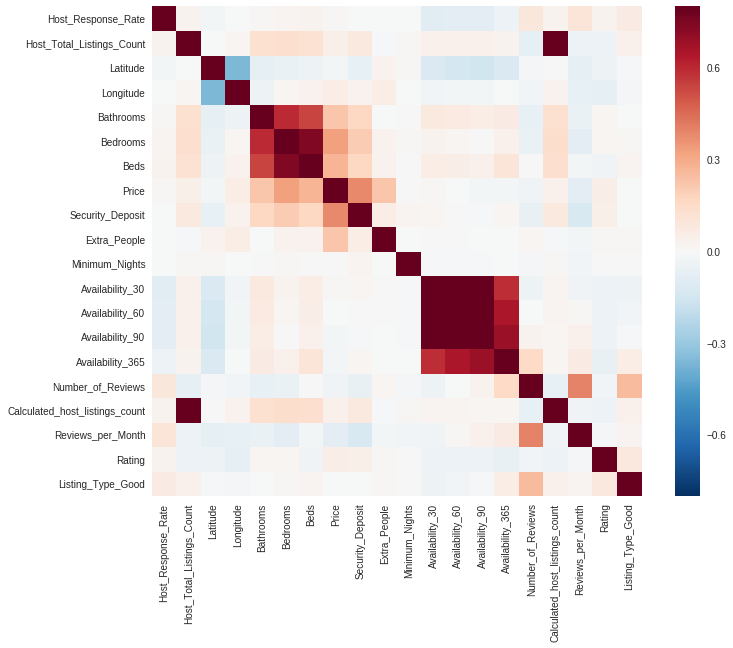

In [148]:
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
# vmax are Values to anchor the colormap
sns.heatmap(corrmat, vmax=.8, square=True);

## Calculated_host_listings_count and Host_Total_Listings_Count || Guest_Included

As we can see from above collinearity matrix column  'Host_Total_Listings_Count' and 'Calculated_host_listings_count' are collinear. Therefore, we should drop one of them. They give almost the same information so multicollinearity really occurs
We are dropping 'Calculated_host_listings_count' beacuse it has more missing values than ther other one.
We are also dropping Guest_Included column because it consists total number of host and extra people.

In [149]:
print(df['Host_Total_Listings_Count'].isna().sum())
print(test_df['Host_Total_Listings_Count'].isna().sum())
print("-"*25)
print(df['Calculated_host_listings_count'].isna().sum())
print(test_df['Calculated_host_listings_count'].isna().sum())

364
93
-------------------------
609
167


In [0]:
#Droping
df = df.drop(['Calculated_host_listings_count', 'Guests_Included'], axis=1)
test_df = test_df.drop(['Calculated_host_listings_count', 'Guests_Included'], axis=1)

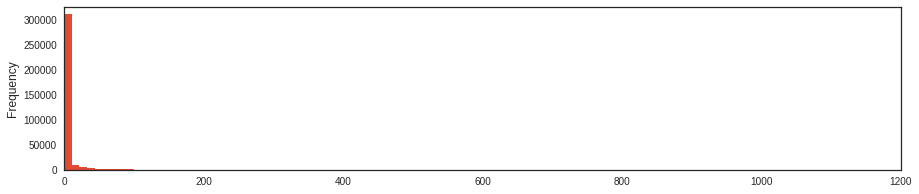

In [151]:
# for df and test_df, since there is a missing "Host_Total_Listings_Count" values
df["Host_Total_Listings_Count"].fillna(df["Host_Total_Listings_Count"].median(), inplace=True)
test_df["Host_Total_Listings_Count"].fillna(test_df["Host_Total_Listings_Count"].median(), inplace=True)

# convert from float to int
df['Host_Total_Listings_Count'] = df['Host_Total_Listings_Count'].astype(int)
test_df['Host_Total_Listings_Count'] = test_df['Host_Total_Listings_Count'].astype(int)

df['Host_Total_Listings_Count'].plot(kind='hist', figsize=(15,3),bins=100, xlim=(0,1200))

In [152]:
# Divide 'Host_Total_Listings_Count' into groups
a = pd.cut(df['Host_Total_Listings_Count'], 2)
print (df.groupby(a).Listing_Type_Good.mean())

Host_Total_Listings_Count
(-1.114, 557.0]    0.908093
(557.0, 1114.0]    0.993719
Name: Listing_Type_Good, dtype: float64


In [0]:
# Assign number to Host_Total_Listings_Count limits
df.Host_Total_Listings_Count.loc[ (df.Host_Total_Listings_Count <= 557) ]= 0
df.Host_Total_Listings_Count.loc[ (df.Host_Total_Listings_Count > 557) ]= 1

test_df.Host_Total_Listings_Count.loc[ (test_df.Host_Total_Listings_Count <= 557) ]= 0
test_df.Host_Total_Listings_Count.loc[ (test_df.Host_Total_Listings_Count > 557) ]= 1


## Availability_30 || Availability_60 || Availability_90

A/c to corellation matrix Availability_30, Availability_60 and Availability_90 store almost same information. Therefore I decided to keep only 1 of them. I am keeping Availability_30 because if any property is available for 30 days then it is not necessary that it will be still available in 60 days and 90 days. But i also have Availability_365 to keep track.
All of them are non-empty columns.

In [154]:
print(df['Availability_30'].isna().sum())
print(df['Availability_60'].isna().sum())
print(df['Availability_90'].isna().sum())

0
0
0


In [0]:
#Droping
df = df.drop(['Availability_60'], axis=1)
test_df = test_df.drop(['Availability_60'], axis=1)

df = df.drop(['Availability_90'], axis=1)
test_df = test_df.drop(['Availability_90'], axis=1)

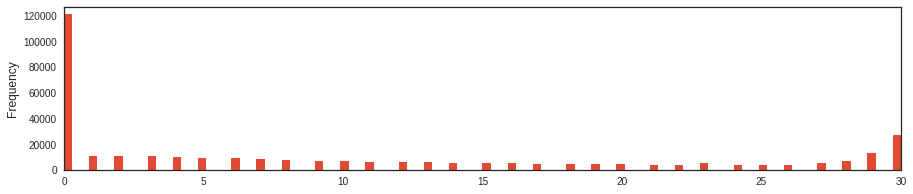

In [156]:
df['Availability_30'].plot(kind='hist', figsize=(15,3),bins=100, xlim=(0,30))

In [157]:
# Divide 'Availability_30' into groups
a = pd.cut(df['Availability_30'], 3)
print (df.groupby(a).Listing_Type_Good.mean())

Availability_30
(-0.03, 10.0]    0.914248
(10.0, 20.0]     0.947215
(20.0, 30.0]     0.866857
Name: Listing_Type_Good, dtype: float64


In [0]:
# Assign number to Availability_30 limits
df.Availability_30.loc[ (df.Availability_30 <= 10) ]= 0
df.Availability_30.loc[ (df.Availability_30 > 10) & (df.Availability_30 <=  20) ]= 1
df.Availability_30.loc[ (df.Availability_30 > 20) ]= 2


In [0]:
test_df.Availability_30.loc[ (test_df.Availability_30 <= 10) ]= 0
test_df.Availability_30.loc[ (test_df.Availability_30 > 10) & (test_df.Availability_30 <=  20) ]= 1
test_df.Availability_30.loc[ (test_df.Availability_30 > 20) ]= 2


## Availability_365

In [160]:
print(df['Availability_365'].isna().sum())

0


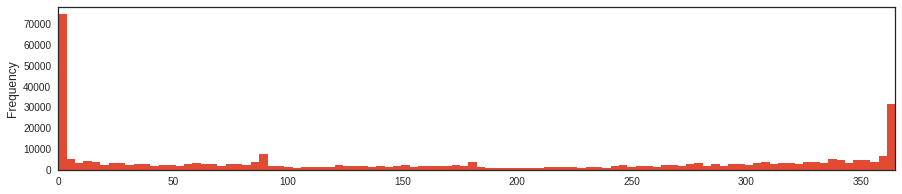

In [161]:
df['Availability_365'].plot(kind='hist', figsize=(15,3),bins=100, xlim=(0,365))

In [162]:
# Divide 'Availability_365' into groups
a = pd.cut(df['Availability_365'], 5)
print (df.groupby(a).Listing_Type_Good.mean())

Availability_365
(-0.365, 73.0]    0.883537
(73.0, 146.0]     0.914024
(146.0, 219.0]    0.922573
(219.0, 292.0]    0.961469
(292.0, 365.0]    0.914318
Name: Listing_Type_Good, dtype: float64


In [0]:
# Assign number to Availability_365 limits
df.Availability_365.loc[ (df.Availability_365 <= 73) ]= 0
df.Availability_365.loc[ (df.Availability_365 > 73) & (df.Availability_365 <=  146) ]= 1
df.Availability_365.loc[ (df.Availability_365 > 146) & (df.Availability_365 <=  219) ]= 2
df.Availability_365.loc[ (df.Availability_365 > 219) & (df.Availability_365 <=  292) ]= 3
df.Availability_365.loc[ (df.Availability_365 > 292) ]= 4

test_df.Availability_365.loc[ (test_df.Availability_365 <= 73) ]= 0
test_df.Availability_365.loc[ (test_df.Availability_365 > 73) & (test_df.Availability_365 <=  146) ]= 1
test_df.Availability_365.loc[ (test_df.Availability_365 > 146) & (test_df.Availability_365 <=  219) ]= 2
test_df.Availability_365.loc[ (test_df.Availability_365 > 219) & (test_df.Availability_365 <=  292) ]= 3
test_df.Availability_365.loc[ (test_df.Availability_365 > 292) ]= 4


## Minimum Nights

In [164]:
df['Minimum_Nights'].isna().sum()
test_df['Minimum_Nights'].isna().sum()

0

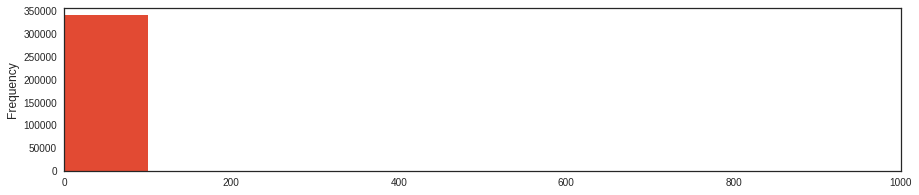

In [165]:
df['Minimum_Nights'].plot(kind='hist', figsize=(15,3),bins=100, xlim=(0,1000))

In [166]:
# Divide 'Minimum_Nights' into groups
a = pd.cut(df['Minimum_Nights'], 2)
print (df.groupby(a).Listing_Type_Good.mean())

Minimum_Nights
(-8.999, 5000.5]     0.908453
(5000.5, 10000.0]    1.000000
Name: Listing_Type_Good, dtype: float64


In [0]:
# Assign number to Availability_365 limits
df.Minimum_Nights.loc[ (df.Minimum_Nights <= 5000.5) ]= 0
df.Minimum_Nights.loc[ (df.Minimum_Nights > 5000.5) ]= 1

test_df.Minimum_Nights.loc[ (test_df.Minimum_Nights <= 5000.5) ]= 0
test_df.Minimum_Nights.loc[ (test_df.Minimum_Nights > 5000.5) ]= 1

## Maximum_Nights

In [168]:
df['Maximum_Nights'].isna().sum()
test_df['Maximum_Nights'].isna().sum()

0

In [0]:
# convert from string to int
df.Maximum_Nights = pd.to_numeric(df.Maximum_Nights, errors='coerce')
test_df.Maximum_Nights = pd.to_numeric(test_df.Maximum_Nights, errors='coerce')

In [170]:
# Divide 'Maximum_Nights' into groups
a = pd.cut(df['Maximum_Nights'], 3)
print (df.groupby(a).Listing_Type_Good.mean())

Maximum_Nights
(-2147482.646, 715827883.0]     0.908449
(715827883.0, 1431655765.0]     1.000000
(1431655765.0, 2147483647.0]    0.933333
Name: Listing_Type_Good, dtype: float64


In [0]:
# Assign number to Maximum_Nights limits
df.Maximum_Nights.loc[ (df.Maximum_Nights <= 715827883) ]= 0
df.Maximum_Nights.loc[ (df.Maximum_Nights > 715827883.0) & (df.Maximum_Nights <=  1431655765.0) ]= 1
df.Maximum_Nights.loc[ (df.Maximum_Nights > 1431655765.0) ]= 2

test_df.Maximum_Nights.loc[ (test_df.Maximum_Nights <= 715827883.0) ]= 0
test_df.Maximum_Nights.loc[ (test_df.Maximum_Nights > 715827883.0) & (test_df.Maximum_Nights <=  1431655765.0) ]= 1
test_df.Maximum_Nights.loc[ (test_df.Maximum_Nights > 1431655765.0) ]= 2

## Bathrooms

In [172]:
df['Bathrooms'].value_counts()

1.0     260622
2.0      39900
1.5      19136
2.5       6014
3.0       5828
0.5       1960
4.0       1531
3.5       1485
0.0        948
5.0        517
4.5        388
6.0        237
8.0        213
5.5        158
7.0        106
6.5         71
7.5         29
10.0         1
Name: Bathrooms, dtype: int64

In [173]:
print(df['Bathrooms'].isna().sum())
print(test_df['Bathrooms'].isna().sum())

1044
338


In [0]:
df['Bathrooms'].fillna(1, inplace=True)
test_df['Bathrooms'].fillna(1, inplace=True)

In [0]:
# convert from float to int
df['Bathrooms'] = df['Bathrooms'].astype(int)
test_df['Bathrooms'] = test_df['Bathrooms'].astype(int)


## Room_Type

In [176]:
df['Room_Type'].isna().sum()

0

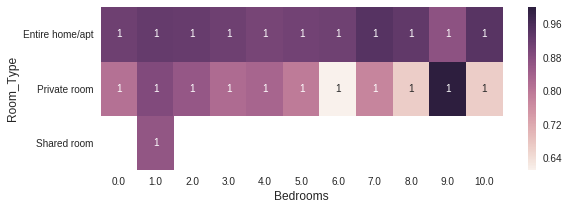

In [177]:
plt.figure(figsize=(9,3))
sns.heatmap(df.groupby(['Room_Type', 'Bedrooms']).Listing_Type_Good.mean().unstack(), annot=True, fmt=".0f")

In [178]:
df['Room_Type'].value_counts()

Entire home/apt    216012
Private room       118010
Shared room          6166
Name: Room_Type, dtype: int64

In [179]:
df[['Room_Type', 'Listing_Type_Good']].groupby(['Room_Type'], as_index=False).mean()

,Room_Type,Listing_Type_Good
0,Entire home/apt,0.920546
1,Private room,0.888535
2,Shared room,0.866040


In [0]:
# dummy encoding
df = pd.get_dummies(df,columns=['Room_Type'])
test_df = pd.get_dummies(test_df,columns=['Room_Type'])

## Beds and Bedrooms

In [181]:
print(df['Beds'].isna().sum())
print(test_df['Beds'].isna().sum())

print(df['Bedrooms'].isna().sum())
print(test_df['Bedrooms'].isna().sum())

660
171
439
125


In [0]:
df['Beds'].fillna(1, inplace=True)
test_df['Beds'].fillna(1, inplace=True)

df['Bedrooms'].fillna(1, inplace=True)
test_df['Bedrooms'].fillna(1, inplace=True)

In [0]:
# convert from float to int
df['Beds'] = df['Beds'].astype(int)
test_df['Beds'] = test_df['Beds'].astype(int)


In [184]:
# Divide 'Beds' into groups
a = pd.cut(df['Beds'], 3)
print (df.groupby(a).Listing_Type_Good.mean())

Beds
(-0.019, 6.333]    0.908097
(6.333, 12.667]    0.931501
(12.667, 19.0]     0.916309
Name: Listing_Type_Good, dtype: float64


In [0]:
# Assign number to Beds limits
df.Beds.loc[ (df.Beds <= 6.333) ]= 0
df.Beds.loc[ (df.Beds > 6.333) & (df.Beds <=  12.667) ]= 1
df.Beds.loc[ (df.Beds > 12.667) ]= 2

test_df.Beds.loc[ (test_df.Beds <= 6.333) ]= 0
test_df.Beds.loc[ (test_df.Beds > 6.333) & (test_df.Beds <=  12.667) ]= 1
test_df.Beds.loc[ (test_df.Beds > 12.667) ]= 2

# Cancellation Policy

In [186]:
# count the NaN values in a column in df
print(df['Cancellation_Policy'].isna().sum())
print(test_df['Cancellation_Policy'].isna().sum())

0
0


In [187]:
# inspect the correlation between Cancellation_Policy and Listing_Type_Good
df[['Cancellation_Policy', 'Listing_Type_Good']].groupby(['Cancellation_Policy'], as_index=False).mean()

,Cancellation_Policy,Listing_Type_Good
0,flexible,0.827366
1,flexible_new,0.847365
2,long_term,1.000000
3,moderate,0.945426
4,moderate_new,0.946935
5,no_refunds,1.000000
6,strict,0.950736
7,strict_new,0.960295
8,super_strict_30,0.940496
9,super_strict_30_new,1.000000


In [188]:
df['Cancellation_Policy'].value_counts()

strict                 128187
flexible               109382
moderate                85297
moderate_new             5955
strict_new               5566
flexible_new             4193
super_strict_60           950
super_strict_30           605
super_strict_30_new        27
super_strict_60_new        21
no_refunds                  3
long_term                   2
Name: Cancellation_Policy, dtype: int64

In [189]:
test_df['Cancellation_Policy'].value_counts()

strict                 37777
flexible               32396
moderate               25535
moderate_new            1646
strict_new              1614
flexible_new            1277
super_strict_60          269
super_strict_30          176
super_strict_30_new        9
super_strict_60_new        1
no_refunds                 1
Name: Cancellation_Policy, dtype: int64

In [0]:
# The main categories of Ticket are "strict", "flexible", "moderate".

# So I will combine "strict", "strict_new", "super_strict_60", "super_strict_30", "super_strict_30_new", "super_strict_60_new","long_term" and "no_refunds" together.
df['Cancellation_Policy'] = df['Cancellation_Policy'].replace(["strict_new", "super_strict_60", "super_strict_30", "super_strict_30_new", "super_strict_60_new", "long_term", "no_refunds"], "strict")
test_df['Cancellation_Policy'] = test_df['Cancellation_Policy'].replace(["strict_new", "super_strict_60", "super_strict_30", "super_strict_30_new", "super_strict_60_new", "no_refunds"], "strict")

# Replace "moderate_new" by "moderate".
df['Cancellation_Policy'] = df['Cancellation_Policy'].replace(["moderate_new"], "moderate")
test_df['Cancellation_Policy'] = test_df['Cancellation_Policy'].replace(["moderate_new"], "moderate")

# Replace "flexible_new" by "flexible" 
df['Cancellation_Policy'] = df['Cancellation_Policy'].replace(["flexible_new"], "moderate")
test_df['Cancellation_Policy'] = test_df['Cancellation_Policy'].replace(["flexible_new"], "moderate")

In [0]:
# dummy encoding
df = pd.get_dummies(df,columns=['Cancellation_Policy'])
test_df = pd.get_dummies(test_df,columns=['Cancellation_Policy'])

# Experiences_Offered

In [192]:
df['Experiences_Offered'].value_counts()

none        337956
business       723
social         653
family         560
romantic       296
Name: Experiences_Offered, dtype: int64

In [193]:
test_df['Experiences_Offered'].isna().sum()

0

In [0]:
# dummy encoding
df = pd.get_dummies(df,columns=['Experiences_Offered'])
test_df = pd.get_dummies(test_df,columns=['Experiences_Offered'])

# Date

In [0]:
from datetime import datetime
from dateutil.parser import parse
from datetime import timedelta

df['First_Review'] = pd.to_datetime(df['First_Review'])
df['Host_Since'] = pd.to_datetime(df['Host_Since'])
df['Last_Review'] = pd.to_datetime(df['Last_Review'])
df['First_Review'] = df['First_Review'].apply(lambda x: x.date())
df['Host_Since'] = df['Host_Since'].apply(lambda x: x.date())
df['Last_Review'] = df['Last_Review'].apply(lambda x: x.date())


test_df['First_Review'] = pd.to_datetime(test_df['First_Review'])
test_df['Host_Since'] = pd.to_datetime(test_df['Host_Since'])
test_df['Last_Review'] = pd.to_datetime(test_df['Last_Review'])
test_df['First_Review'] = test_df['First_Review'].apply(lambda x: x.date())
test_df['Host_Since'] = test_df['Host_Since'].apply(lambda x: x.date())
test_df['Last_Review'] = test_df['Last_Review'].apply(lambda x: x.date())


In [196]:
df['First_Review'][0]

datetime.date(2011, 8, 27)

#Bed_Type

In [197]:
df['Bed_Type'].value_counts()

Real Bed         328657
Pull-out Sofa      6727
Futon              2466
Couch              1400
Airbed              938
Name: Bed_Type, dtype: int64

In [198]:
test_df['Bed_Type'].isna().sum()

0

In [0]:
# dummy encoding
df = pd.get_dummies(df,columns=['Bed_Type'])
test_df = pd.get_dummies(test_df,columns=['Bed_Type'])

# Amenities

In [0]:
df = df.dropna(subset=['Amenities'])
test_df = test_df.dropna(subset=['Amenities'])

In [0]:
df = df.reset_index(drop = True)

In [0]:
df['Amenities'] = df['Amenities'].map(
    lambda amns: "|".join([amn.replace("}", "").replace("{", "").replace('"', "")\
                           for amn in amns.split(",")]))

In [213]:
np.concatenate(df['Amenities'].map(lambda amns: amns.split("|")).values)

array(['TV', 'Internet', 'Wireless Internet', ..., 'Iron',
       'Laptop friendly workspace',
       'translation missing: en.hosting_amenity_50'], dtype='<U42')

In [0]:
amenities = np.unique(np.concatenate(df['Amenities'].map(lambda amns: amns.split("|")).values))
amenities_matrix = np.array([df['Amenities'].map(lambda amns: amn in amns).values for amn in amenities])


In [215]:
amenities_matrix

array([[ True,  True,  True, ...,  True,  True,  True],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [ True, False,  True, ...,  True,  True,  True],
       [False, False, False, ..., False, False, False],
       [False, False, False, ...,  True, False,  True]])

In [216]:
df['Amenities'].map(lambda amns: amns.split("|")).head()

0    [TV, Internet, Wireless Internet, Air conditio...
1    [Internet, Kitchen, Pets live on this property...
2    [TV, Internet, Wireless Internet, Kitchen, Hea...
3    [TV, Cable TV, Internet, Wireless Internet, Ai...
4    [TV, Air conditioning, Kitchen, Smoking allowe...
Name: Amenities, dtype: object

In [217]:
np.unique(np.concatenate(df['Amenities'].map(lambda amns: amns.split("|"))))[1:]


array(['24-Hour Check-in', '24-hour check-in', 'Accessible-height bed',
       'Accessible-height toilet', 'Air Conditioning', 'Air conditioning',
       'BBQ grill', 'Baby bath', 'Baby monitor',
       'Babysitter recommendations', 'Bathtub', 'Beach essentials',
       'Beachfront', 'Bed linens', 'Breakfast',
       'Buzzer/Wireless Intercom', 'Buzzer/wireless intercom', 'Cable TV',
       'Carbon Monoxide Detector', 'Carbon monoxide detector', 'Cat(s)',
       'Changing table', 'Children’s books and toys',
       'Children’s dinnerware', 'Cleaning before checkout',
       'Coffee maker', 'Cooking basics', 'Crib', 'Disabled parking spot',
       'Dishes and silverware', 'Dishwasher', 'Dog(s)', 'Doorman',
       'Doorman Entry', 'Dryer', 'EV charger', 'Elevator in Building',
       'Elevator in building', 'Essentials', 'Ethernet connection',
       'Extra pillows and blankets', 'Family/Kid Friendly',
       'Family/kid friendly', 'Fire Extinguisher', 'Fire extinguisher',
       'Firepl

In [221]:
amenities = np.unique(np.concatenate(df['Amenities'].map(lambda amns: amns.split("|"))))[1:]
amenity_arr = np.array([df['Amenities'].map(lambda amns: amn in amns) for amn in amenities])
amenity_arr

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [ True, False,  True, ...,  True,  True,  True],
       [False, False, False, ..., False, False, False],
       [False, False, False, ...,  True, False,  True]])

#Model trainig

In [0]:
features = df[['Rating', 'Host_Response_Rate', 'Bathrooms', 'Bedrooms', 'Beds', 'Maximum_Nights', 'Minimum_Nights', 'Availability_30', 'Availability_365', 'Extra_People',
                      'Room_Type_Entire home/apt', 'Room_Type_Private room', 'Room_Type_Shared room', 'Number_of_Reviews', 'Cancellation_Policy_flexible', 'Cancellation_Policy_moderate',
                      'Cancellation_Policy_strict', 'Experiences_Offered_business', 'Experiences_Offered_family', 'Experiences_Offered_none', 'Experiences_Offered_romantic', 
                       'Experiences_Offered_social', 'Bed_Type_Airbed', 'Bed_Type_Couch', 'Bed_Type_Futon', 'Bed_Type_Pull-out Sofa', 'Bed_Type_Real Bed']]

In [223]:
features.head()

,Rating,Host_Response_Rate,Bathrooms,Bedrooms,Beds,Maximum_Nights,Minimum_Nights,Availability_30,Availability_365,Extra_People,...,Experiences_Offered_business,Experiences_Offered_family,Experiences_Offered_none,Experiences_Offered_romantic,Experiences_Offered_social,Bed_Type_Airbed,Bed_Type_Couch,Bed_Type_Futon,Bed_Type_Pull-out Sofa,Bed_Type_Real Bed
0,0,3,1,1.0,0,0.0,0.0,2.0,1.0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,3,1,1.0,0,0.0,0.0,0.0,2.0,0,...,0,0,1,0,0,0,0,0,0,1
2,0,3,1,2.0,0,0.0,0.0,0.0,0.0,0,...,0,0,1,0,0,0,0,0,0,1
3,1,3,1,1.0,0,0.0,0.0,0.0,0.0,0,...,0,0,1,0,0,0,0,0,0,1
4,1,3,1,1.0,0,0.0,0.0,0.0,0.0,0,...,0,0,1,0,0,0,0,0,0,1


Introducing Amenities

In [0]:
features = pd.concat([features, pd.DataFrame(data=amenity_arr.T, columns=amenities)], axis=1)

In [226]:
features.head()

,Rating,Host_Response_Rate,Bathrooms,Bedrooms,Beds,Maximum_Nights,Minimum_Nights,Availability_30,Availability_365,Extra_People,...,Wheelchair Accessible,Wheelchair accessible,Wide clearance to bed,Wide clearance to shower and toilet,Wide doorway,Wide hallway clearance,Window guards,Wireless Internet,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50
0,0,3,1,1.0,0,0.0,0.0,2.0,1.0,0,...,False,False,False,False,False,False,False,True,False,False
1,0,3,1,1.0,0,0.0,0.0,0.0,2.0,0,...,False,False,False,False,False,False,False,False,False,False
2,0,3,1,2.0,0,0.0,0.0,0.0,0.0,0,...,False,False,False,False,False,False,False,True,False,False
3,1,3,1,1.0,0,0.0,0.0,0.0,0.0,0,...,False,True,False,False,False,False,False,True,False,False
4,1,3,1,1.0,0,0.0,0.0,0.0,0.0,0,...,False,False,False,False,False,False,False,False,False,False


In [227]:
list(features.columns.values)


['Rating',
 'Host_Response_Rate',
 'Bathrooms',
 'Bedrooms',
 'Beds',
 'Maximum_Nights',
 'Minimum_Nights',
 'Availability_30',
 'Availability_365',
 'Extra_People',
 'Room_Type_Entire home/apt',
 'Room_Type_Private room',
 'Room_Type_Shared room',
 'Number_of_Reviews',
 'Cancellation_Policy_flexible',
 'Cancellation_Policy_moderate',
 'Cancellation_Policy_strict',
 'Experiences_Offered_business',
 'Experiences_Offered_family',
 'Experiences_Offered_none',
 'Experiences_Offered_romantic',
 'Experiences_Offered_social',
 'Bed_Type_Airbed',
 'Bed_Type_Couch',
 'Bed_Type_Futon',
 'Bed_Type_Pull-out Sofa',
 'Bed_Type_Real Bed',
 '24-Hour Check-in',
 '24-hour check-in',
 'Accessible-height bed',
 'Accessible-height toilet',
 'Air Conditioning',
 'Air conditioning',
 'BBQ grill',
 'Baby bath',
 'Baby monitor',
 'Babysitter recommendations',
 'Bathtub',
 'Beach essentials',
 'Beachfront',
 'Bed linens',
 'Breakfast',
 'Buzzer/Wireless Intercom',
 'Buzzer/wireless intercom',
 'Cable TV',
 'Car

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, df['Listing_Type_Good'], test_size = 0.001, random_state = 891990)
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)


In [0]:
gbm = xgb.XGBClassifier(n_estimators= 2000,max_depth= 4,min_child_weight= 2,gamma=0.9,subsample=0.8,colsample_bytree=0.8,
                        objective= 'binary:logistic',nthread= -1,scale_pos_weight=1)
gbm.fit(X_train, y_train)

Y_pred = gbm.predict(X_test)

gbm.score(X_train, y_train)

In [0]:
import pickle
pickle.dump(gbm, open("People_Model.pickle.dat", "wb"))